# Sampling from the von Mises - Fisher distribution

The von Mises - Fisher distribution is a probability distribution on the surface of a unit hypersphere of N dimensions: 

<div><center>
    $f_N(x ; \mu, \kappa)$
<center></div>

Where:
* $\mu$ is the mean direction 
* $\kappa$ is the concentration parameter

Wikipedia page: https://en.wikipedia.org/wiki/Von_Mises%E2%80%93Fisher_distribution 

Code used in this example is based on [this](https://stats.stackexchange.com/questions/156729/sampling-from-von-mises-fisher-distribution-in-python) and [this](https://github.com/clara-labs/spherecluster/blob/develop/spherecluster/util.py).

In [1]:
%matplotlib inline
import numpy as np
from sphere import *

## For ${\rm I\!R}^3$

For N = 3 dimensions, the von Mises - Fisher distribution is defined on the surface of a sphere.

In [2]:
# specify mu as a some 3D vector
mu = [2, -2, 3]

# normalise to a unit vector 
norm = np.linalg.norm(mu)
mu = mu / norm
print ('average direction:', mu)

# sampling
num_samples = 500
kappa = [1, 10, 100]

average direction: [ 0.48507125 -0.48507125  0.72760688]


In [3]:
# sample from vMF for a range of kappa
samples = []
for k in kappa:
    samples.append(Sphere().sample(num_samples, distribution = 'vMF', 
                                   mu = mu, kappa = k))

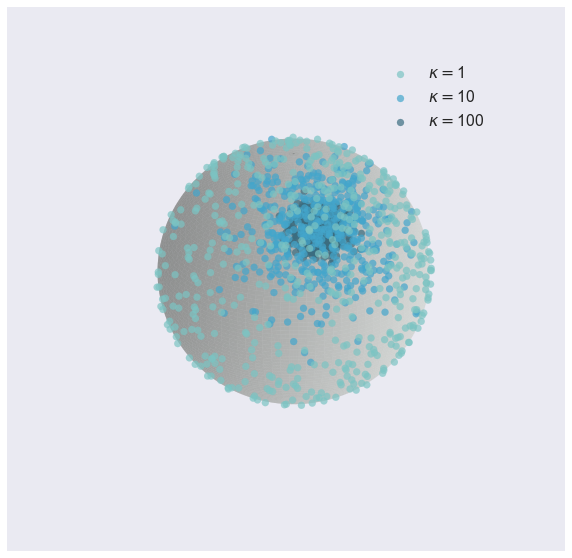

In [4]:
# plot points on the unit sphere
Sphere().plot(data = samples)

## Sampling uniformly over the sphere

To contrast, consider a sampler which draws points uniformly on the spherical shell. See [here](http://mathworld.wolfram.com/SpherePointPicking.html) for different implementations.

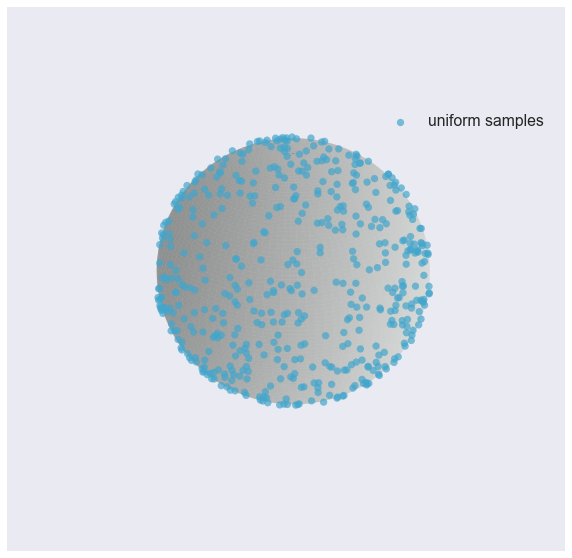

In [5]:
# sample uniformly over a unit sphere
samples = Sphere().sample(num_samples)
Sphere().plot(data = samples)

## Simulation in Stan

Using the vMF_rng defined in `vMF.stan`.

In [6]:
import pystan
simulation = pystan.StanModel(file = 'vMF_sim.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d2b25e5a14fc02d0313002f4c89973b6 NOW.


In [14]:
# Use stan to simulate draws from the vMF
kappa = [1, 10, 100]
samples = []
for k in kappa:
    simu_parameters = {'N' : num_samples,
                       'mu' : mu,
                       'kappa' : k}

    simu = simulation.sampling(data = simu_parameters, algorithm = "Fixed_param", 
                               iter = 1, chains = 1, seed = 19920715)

    sample = simu.extract(['vMF_samples'])['vMF_samples'][0]
    samples .append(vMFSample(sample, k))

/Users/fran/projects/bayes/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


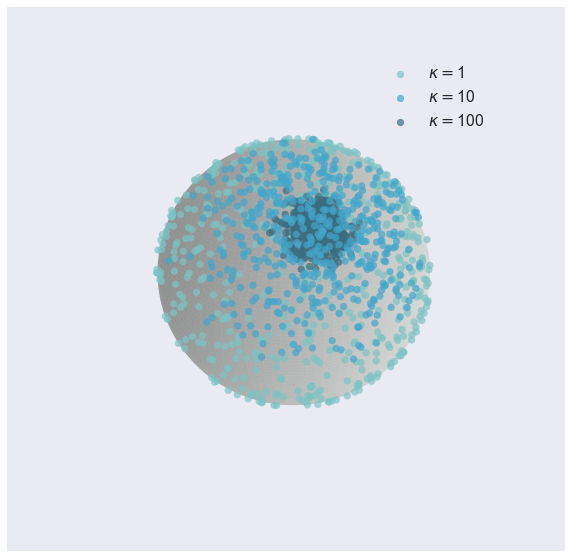

In [15]:
Sphere().plot(data = samples)